# Librerias

In [8]:
import pandas as pd 
from conexion import desencriptar_archivo
from fn_prep import *
from Datasets import *
from binance.spot import Spot
import numpy as np
from plotting import *

'''
import matplotlib.pyplot as plt
import ta
from fechas import *
from datetime import timedelta
'''

'\nimport matplotlib.pyplot as plt\nimport ta\nfrom fechas import *\nfrom datetime import timedelta\n'

# Datos

In [9]:
# Lee la clave hash para desencriptar
with open('/home/hector/Documentos/Escuelas/Autodidacta/Trading/Data/clave.key', 'r') as clave_file:
    clave = clave_file.read()
# Lee las contraseñas del archivo encriptado y muestra el resultado deseado
contraseñas = desencriptar_archivo('Data/credenciales.txt', clave)
cliente = Spot(key=contraseñas["APY_KEY_B"],secret=contraseñas["SECRET_KEY_B"])

In [10]:
# Generar un dataframe de Binance
symbol = "BTCUSDT"
interval = "1h"
type_upload = 'manual' # ['auto','manual']
date_start = '2021-01-01 00:00:00' # En caso de que type_update==manual especificar 
format_date_start = '%Y-%m-%d %H:%M:%S' # Poner conforme al date_start, en caso de ser auto, no mover
table_name = symbol +'_'+ interval



df = generate_dataset(cliente, symbol, interval,
                     date_start,fecha_format=format_date_start,
                    type_upload=type_upload,
                    con=None,table_name=None)
df.Name = table_name
df.Close_Time = df.Close_Time #+ timedelta(seconds=1)
# Hacer index la fecha
df = df.set_index("Close_Time")
# Borramos col ignore
df.drop(columns='Ignore',inplace=True)
# Hacer respaldo 
df_respaldo = df.copy()
df.shape

(24934, 10)

In [11]:
# Quitamos ultimo registro.
df = df.iloc[:-1,:]
df.tail(7)

,Open_Time,Open,High,Low,Close,Volumne,Quote_asset_vol,Number_trades,Taker_buy_base,Taker_buy_quote
Close_Time,,,,,,,,,,
2023-11-06 04:59:59.999,2023-11-06 04:00:00,35118.19,35276.33,35086.78,35158.22,1374.33426,4.835353e+07,53104,728.05423,2.561637e+07
2023-11-06 05:59:59.999,2023-11-06 05:00:00,35158.23,35237.50,35057.55,35232.45,1060.50140,3.729705e+07,44010,506.38066,1.781271e+07
2023-11-06 06:59:59.999,2023-11-06 06:00:00,35232.45,35250.00,35113.99,35206.37,1248.03263,4.391785e+07,48125,612.95808,2.157130e+07
2023-11-06 07:59:59.999,2023-11-06 07:00:00,35206.38,35218.93,34902.06,35030.36,2065.88559,7.238738e+07,75653,881.25267,3.086641e+07
2023-11-06 08:59:59.999,2023-11-06 08:00:00,35030.36,35207.00,35025.16,35200.00,1188.47892,4.172127e+07,56463,661.53893,2.322356e+07
2023-11-06 09:59:59.999,2023-11-06 09:00:00,35200.00,35210.00,35061.71,35080.95,913.19538,3.208658e+07,44736,437.84381,1.538431e+07
2023-11-06 10:59:59.999,2023-11-06 10:00:00,35080.95,35111.10,34923.70,34967.24,1059.88333,3.710802e+07,49707,510.15261,1.786163e+07


## Cambio percentual y direccion para el n-esimo periodo
Variable a explicar.

En esta seccion pondremos la variable a clasificar. 

El modelo esta destinado a pronosticar si el periodo proximo subira o bajara.


In [12]:

n_period = 3
col_use = "Close"
dict_bi = {"UP":1, "DOWN":0}

cols_dir, cols_pc = get_cols_pc_and_dir(n_period,col_use)

df = change_percentual(df,col_use,n_periods=n_period,
                      get_direction=True,all_periods=True)

for col in cols_dir:
    df[col] = df[col].map(dict_bi)

df[[col_use]+cols_dir+cols_pc]


,Close,Close_dir_1,Close_dir_2,Close_dir_3,Close_pc_1,Close_pc_2,Close_pc_3
Close_Time,,,,,,,
2021-01-01 00:59:59.999,29174.35,0,0,1,-0.280206,-0.601172,0.095404
2021-01-01 01:59:59.999,29092.83,0,1,1,-0.320069,0.374561,0.448230
2021-01-01 02:59:59.999,29000.01,1,1,1,0.692413,0.765848,1.069405
2021-01-01 03:59:59.999,29202.21,1,1,1,0.073947,0.379620,0.107001
2021-01-01 04:59:59.999,29223.82,1,1,1,0.305900,0.033079,0.817824
...,...,...,...,...,...,...,...
2023-11-06 06:59:59.999,35206.37,0,0,0,-0.502450,-0.018097,-0.357516
2023-11-06 07:59:59.999,35030.36,1,1,0,0.481932,0.144209,-0.180512
2023-11-06 08:59:59.999,35200.00,0,0,0,-0.339358,-0.665652,NaN


## Indicadores tecnicos

In [13]:
# Version libreria ta.
col_use = "Close"

# Para medias moviles
periodos_ema = [8,13,55,144]

# Para Bandas Bolllinguer
ventana_bb = 20
desviacion_bb = 2

# Para MACD
window_slow = 26
window_fast = 12
window_sign = 9

# Para RSI
window_rsi = 14

# Para Volumen
col_vol = "Volumne"

df = put_EMA(df,col_use,periodos=periodos_ema)

df = put_BandasBollinguer(df,col_use,ventana_bb, desviacion=desviacion_bb, put_indicator=True)

df = put_MACD(df,col_use, window_slow, window_fast, window_sign)

df['RSI']=ta.momentum.RSIIndicator(close= df[col_use], window= window_rsi, fillna= False).rsi()

df['OBV']= ta.volume.OnBalanceVolumeIndicator(close= df[col_use], volume= df[col_vol], fillna = False).on_balance_volume()

print("shape antes del dropna  " , df.shape )
df.dropna(inplace=True,how='any')
print("Shape despues del dropna ", df.shape)


df.columns

shape antes del dropna   (24933, 30)
Shape despues del dropna  (24787, 30)


Index(['Open_Time', 'Open', 'High', 'Low', 'Close', 'Volumne',
       'Quote_asset_vol', 'Number_trades', 'Taker_buy_base', 'Taker_buy_quote',
       'Close_pc_1', 'Close_pc_2', 'Close_pc_3', 'Close_dir_1', 'Close_dir_2',
       'Close_dir_3', 'EMA8', 'EMA13', 'EMA55', 'EMA144', 'BBH_indicator',
       'BBL_indicator', 'BBH', 'BBL', 'BBA', 'MACD_line', 'MACD_signal',
       'MACD_diff', 'RSI', 'OBV'],
      dtype='object')

### Graficas

Por mejorar:
Hacer que las graficas se muestren en una pantalla que pueda manipular los tamaños, pero debe crearse con unas medidas informativas.

In [14]:
start_date = '2023-10-20 12:00:00'
df_plot = df[df.index>start_date].copy()

#### Media  movil 



Trend Indicators 

These indicators help traders identify the direction and strength of a market trend. They typically measure the asset's price movement over time and help traders determine if a trend is bullish (upward) or bearish (downward).

Example: Moving Averages (MA)
Moving averages smooth out price data by calculating the average price of an asset over a specified time period. Popular types of moving averages include the Simple Moving Average (SMA) and the Exponential Moving Average (EMA). Traders often use moving averages to identify trends and potential entry/exit points.

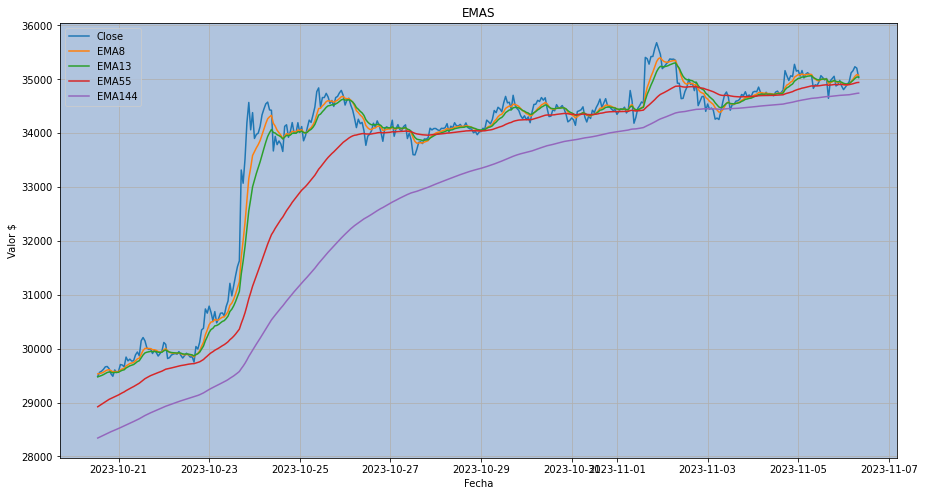

In [15]:
# Graficar EMA's

columns = ["Close",'EMA8', 'EMA13', 'EMA55', 'EMA144']

plot_line(df_plot,columns,
            figsize=(15, 8),title="EMAS")

#### Bandas bollinguer


Volatility Indicators
> These indicators measure the degree of price fluctuations and help traders gauge market sentiment and potential price breakouts.

> Bollinger Bands consist of a centerline (typically an SMA) and two outer bands, which are standard deviations above and below the centerline. The bands expand and contract based on market volatility. When the bands are narrow, volatility is low, and when they widen, volatility is high. Traders use Bollinger Bands to identify potential entry/exit points and overbought/oversold conditions.


| <img src="https://a.c-dn.net/b/3u3xku/trading-forex-with-bollinger-bands_body_Mainimage.png" width="50%" alt="BB image credit:https://www.dailyfx.com/">|
|:--:| 
| An example of MACD indicator *image credit: https://www.dailyfx.com/* |

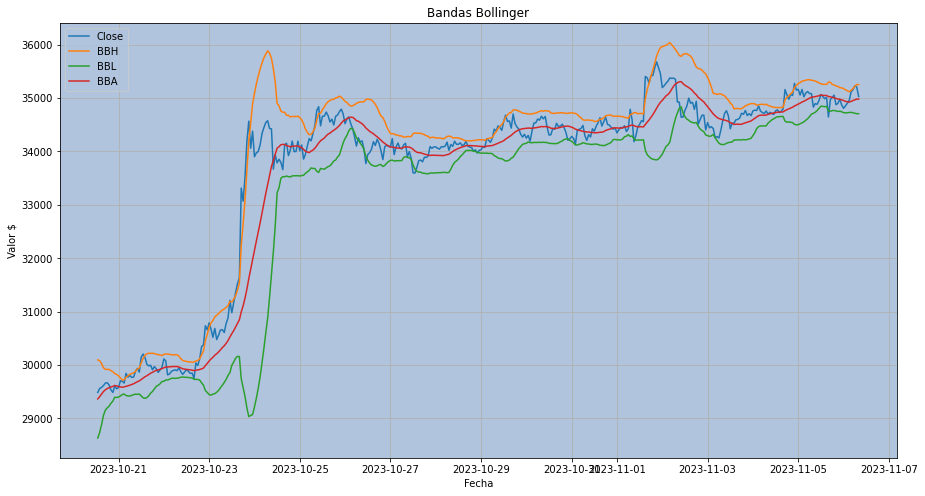

In [16]:
# Graficar las Bandas Bollinger

columns = ["Close",'BBH', 'BBL', 'BBA']


plot_line(df_plot,columns,
              figsize=(15, 8),title="Bandas Bollinger")

#### MACD



Momentum Indicators 

These indicators measure the strength and rate of change in price movements. They help traders identify potential turning points in the market and can indicate whether an asset is overbought or oversold.

Example: Relative Strength Index (RSI) and MACD
The RSI is a popular momentum oscillator that measures the speed and change of price movements on a scale of 0-100. An RSI reading below 30 typically indicates that an asset is oversold, while a reading above 70 suggests that it is overbought.

The Moving Average Convergence Divergence (MACD) is a momentum indicator. It helps traders identify trend direction, potential trend reversals, and the strength of price movements. The MACD is calculated by subtracting a longer-term Exponential Moving Average (EMA) from a shorter-term EMA, usually the 26-day and 12-day EMAs, respectively. A signal line, typically the 9-day EMA of the MACD, is also plotted on the same chart.

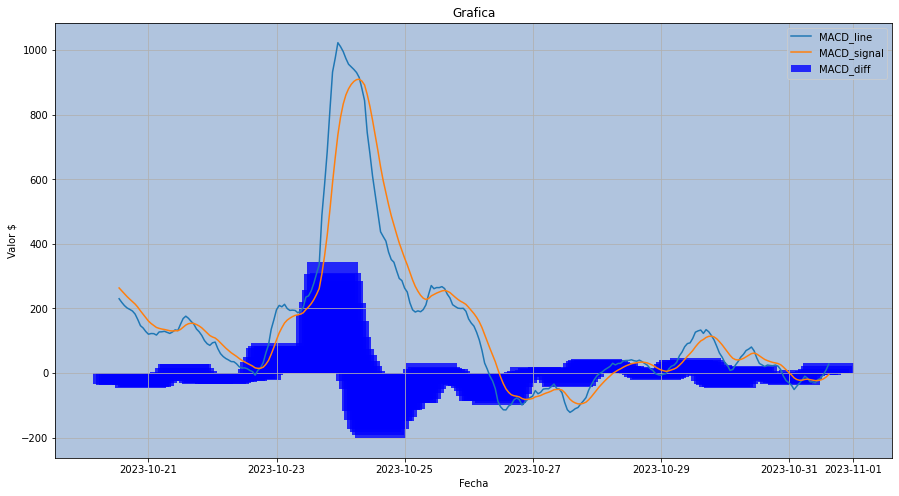

In [ ]:

columns = ['MACD_line', 'MACD_signal']
to_hist = "MACD_diff"

plot_line(df_plot,columns,
              figsize=(15, 8),title="Grafica", make_hist_MACD=to_hist, alpha=0.8,color='b')

#### RSI: Relative Strength Index 


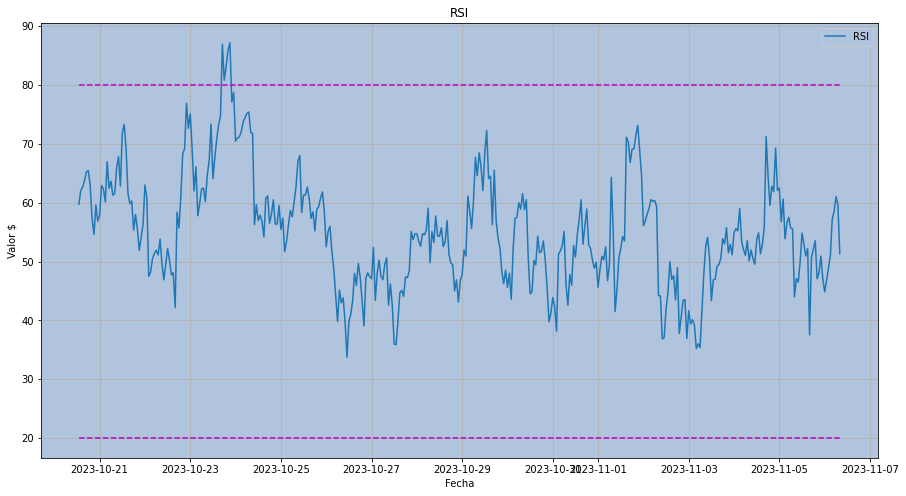

In [17]:
# ploting RSI


rsi = (20,80)
columns = ["RSI"]


plot_line(df_plot,columns,
              figsize=(15, 8),title="RSI", rsi=rsi)

#### Volume Indicators 


> These indicators analyze the trading volume to assess the strength and significance of price movements. High volume can confirm the validity of a trend or signal a reversal.

> On-Balance Volume (OBV) is a cumulative indicator that adds volume on up days and subtracts volume on down days. It helps traders identify buying or selling pressure in the market. A rising OBV indicates strong buying pressure, while a falling OBV signals strong selling pressure (Un OBV en aumento indica una fuerte presión de compra, mientras que un OBV en caída indica una fuerte presión de venta.).
4. Volatility Indicators: These indicators measure the degree of price fluctuations and help traders gauge market sentiment and potential price breakouts.

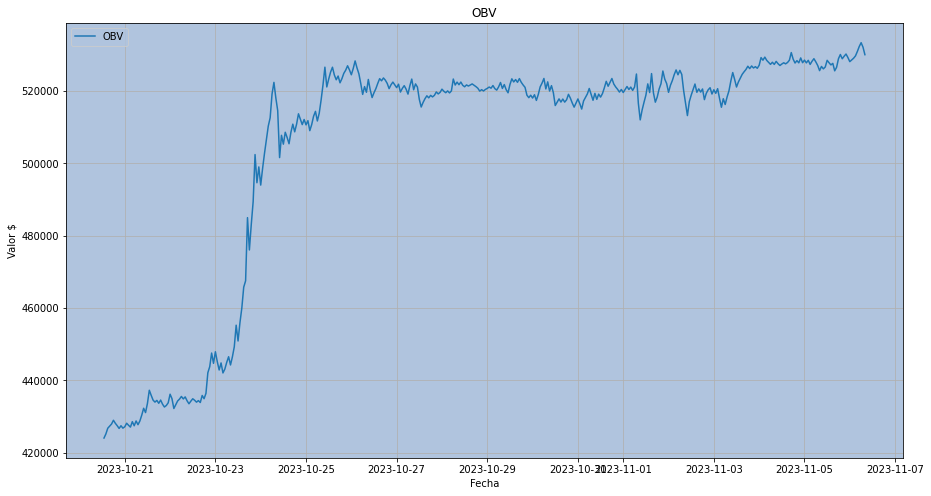

In [18]:
# ploting volumne


columns = ["OBV"]


plot_line(df_plot,columns,
              figsize=(15, 8),title="OBV")

## Outliyers

In [19]:
# Usando la normalizacion  (x-mu)/std
col_use = "Close"
std_tolerancia = 2

df = put_outliers(df,col_use, std_tolerancia)
df['Outliyers_STD'].value_counts()

0.0    23872
1.0      915
Name: Outliyers_STD, dtype: int64

## Lag n-esimo


En las series de tiempo es usual decir que el valor actual de y<sub>n</sub>, depende del valor anterior y<sub>n-1</sub> incluso podemos decir que depende de los ultimos k-periodos. Por lo que la ecuacion seria:

  Y<sub>n</sub> = B<sub>0</sub> + B<sub>1</sub>*y<sub>n-1</sub> + B<sub>2</sub>*y<sub>n-2</sub> + ... + B<sub>k</sub>*y<sub>n-k</sub> + u

In [20]:
col_use = "Close_dir_1"
periodos_lag = 2
cols_lag = []

for i in range(1,periodos_lag+1):
    cols_lag.append(col_use+"_lag_"+str(i))
    df[col_use+"_lag_"+str(i)] = df[col_use].shift(i)
    
print("Shape antes del dropna:   ",df.shape)
df.dropna(inplace=True,how="any")
print("Shape despues del dropna; ", df.shape)

Shape antes del dropna:    (24787, 33)
Shape despues del dropna;  (24785, 33)


## Ingenieria de caracteristicas
En este punto ya tenemos las columnas (cols_x_corrl) que tienen una fuerte correlacion lineal con nuestra variable a explicar, por lo que necesitamos hacer una transformacion a todas las demas que no tienen esta correlacion lineal para hacer nuestro modelo de regresion mas preciso.

In [ ]:
col_y = "Close_dir_1"
col_x = ['Open', 'High', 'Low', 'Close', 'Volumne',
       'Quote_asset_vol', 'Number_trades', 'Taker_buy_base', 'Taker_buy_quote',
       'EMA8', 'EMA13', 'EMA55', 'EMA144', 'BBH_indicator', 'BBL_indicator',
       'BBH', 'BBL', 'BBA', 'MACD_line', 'MACD_signal', 'MACD_diff', 'RSI',
       'OBV', 'Outliyers_STD', 'Close_dir_1_lag_1','Close_dir_1_lag_2']
Y = df[col_y].copy()
X = df[col_x].copy()

In [55]:
import numpy as np
from scipy.stats import pointbiserialr
from sklearn.feature_selection import mutual_info_regression


def corr_point_biserial(variable_binaria, variable_continua,alpha=0.05, show_info=False):

    # Calcula la correlación de punto biserial
    correlation, p_value = pointbiserialr(variable_binaria, variable_continua)

    # Imprime el resultado
    if show_info:
        print(f"Correlación de punto biserial: {correlation:.2f}")
        print(f"Valor p: {p_value:.4f}")

    # Interpreta el resultado
    if p_value < alpha:
        if show_info:
            print("La correlación es significativa.")
        return (correlation, p_value)
    else:
        if show_info:
            print("No hay evidencia de correlación significativa.")
        return None, None
    
    
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


### Correlacion biseral

In [99]:
# Correlacion biserial de los campos
col_use = "Close_dir_1"
#correlation, p_value = 0,0
cols_relevant = []
for col in df.columns:
    if col in cols_dir or col in cols_pc:
        continue
    
    else:
        try:
            correlation, p_value = corr_point_biserial(df[col_use], df[col])
        except Exception as e:
            print("Fallo la col: ", col)
            continue
        if correlation:
            print(col,"  ", correlation, "  ", p_value)
            cols_relevant.append(col)
            
print("columnas relevantes son: ", cols_relevant)

Fallo la col:  Open_Time
BBH_indicator    -0.03407570010752541    8.759855549565119e-08
BBL_indicator    0.04712157413151569    1.349361070684927e-13
MACD_line    -0.02085138809772987    0.0010618976508295402
MACD_diff    -0.04006369415669636    3.1401503184285584e-10
RSI    -0.06305459626460744    3.837763779759649e-23
Close_dir_1_lag_1    -0.061134267845320486    7.556918326980628e-22
Close_dir_1_lag_2    -0.057401022990836534    1.911911452644075e-19
columnas relevantes son:  ['BBH_indicator', 'BBL_indicator', 'MACD_line', 'MACD_diff', 'RSI', 'Close_dir_1_lag_1', 'Close_dir_1_lag_2']


In [69]:
df.columns

Index(['Open_Time', 'Open', 'High', 'Low', 'Close', 'Volumne',
       'Quote_asset_vol', 'Number_trades', 'Taker_buy_base', 'Taker_buy_quote',
       'EMA8', 'EMA13', 'EMA55', 'EMA144', 'BBH_indicator', 'BBL_indicator',
       'BBH', 'BBL', 'BBA', 'MACD_line', 'MACD_signal', 'MACD_diff', 'RSI',
       'OBV', 'Close_pc_1', 'Close_pc_2', 'Close_pc_3', 'Close_dir_1',
       'Close_dir_2', 'Close_dir_3', 'Outliyers_STD', 'Close_dir_1_lag_1',
       'Close_dir_1_lag_2'],
      dtype='object')

### PCA
Continuar este proceso. </br>
retomar algunos codigos necesarios y borrar los otros. <br>


El Algoritmo de PCA (Principal Components Analisys) tiene como objetivo reducir la dimension del espacio muestral. 

In [81]:
# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=X.columns)

X_pca.head()

,Open,High,Low,Close,Volumne,Quote_asset_vol,Number_trades,Taker_buy_base,Taker_buy_quote,EMA8,...,BBL,BBA,MACD_line,MACD_signal,MACD_diff,RSI,OBV,Outliyers_STD,Close_dir_1_lag_1,Close_dir_1_lag_2
0,-0.556604,-0.065432,-3.092644,-2.898067,-0.113719,0.069892,0.588380,0.487171,-0.078888,0.601573,...,0.008215,-0.001231,0.004336,-0.003991,-0.013866,0.000159,-0.003576,-0.000038,7.504848e-15,5.537172e-14
1,-0.403924,0.563058,-3.334929,-2.213368,-1.569521,-0.107908,-0.299050,0.601658,-0.233393,-0.181250,...,0.012887,0.020659,0.021189,-0.016241,-0.007083,0.012008,-0.001459,-0.000034,-1.770765e-14,4.512187e-16
2,-0.544599,0.292772,-3.657707,-1.610867,-0.213642,-0.241165,-1.454012,0.643894,-0.419013,-0.767101,...,0.006972,0.009547,0.001050,-0.005824,-0.006282,0.015826,-0.000096,-0.000015,1.367534e-14,-9.922305e-15
3,-0.687805,-0.274700,-2.912094,-2.445848,1.153644,-0.136639,-0.997778,0.561861,-0.268693,0.296357,...,0.004372,-0.010000,0.006150,0.005763,-0.010801,0.009814,0.000802,-0.000003,7.116848e-15,3.383560e-15
4,-0.556300,0.416318,-3.241482,-2.204336,-1.605869,-0.142984,-0.436847,0.589416,-0.258493,-0.080717,...,-0.009136,0.020703,0.021005,-0.014678,-0.011442,0.002027,0.000126,-0.000019,3.581770e-15,-2.761391e-14


In [82]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=X.columns,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,Open,High,Low,Close,Volumne,Quote_asset_vol,Number_trades,Taker_buy_base,Taker_buy_quote,EMA8,...,BBL,BBA,MACD_line,MACD_signal,MACD_diff,RSI,OBV,Outliyers_STD,Close_dir_1_lag_1,Close_dir_1_lag_2
Open,-0.282446,0.084130,-0.006108,-0.000801,0.008536,0.008006,0.015487,0.021091,-0.051798,0.000898,...,-0.053753,-0.540914,0.010871,0.504472,0.206933,0.517199,0.164853,1.791223e-03,-2.735170e-14,0.000000e+00
High,-0.282184,0.086682,-0.006906,0.003952,0.004481,0.005785,0.014575,0.021210,-0.053113,0.000068,...,-0.300648,-0.123209,0.691714,0.138202,-0.417406,-0.337485,-0.038429,7.886786e-07,-1.631563e-14,1.543958e-14
Low,-0.282718,0.080980,-0.009778,0.002620,0.004649,0.010541,0.013561,0.020323,-0.051240,-0.000695,...,-0.475251,-0.248834,-0.662862,-0.140114,-0.254185,-0.254047,-0.058363,-4.394940e-05,1.597073e-14,-1.605703e-14
Close,-0.282428,0.084138,-0.009508,0.006254,0.000222,0.007923,0.012416,0.020880,-0.052294,-0.001070,...,-0.392832,0.331241,0.182062,-0.535030,0.147059,0.507178,0.152818,2.625832e-03,-1.118863e-14,5.736361e-16
Volumne,0.157405,0.400575,0.010127,-0.003732,0.005415,0.039825,0.005456,0.062094,0.025477,-0.012147,...,-0.231936,0.401789,-0.074909,0.362021,0.007692,0.008350,-0.009004,-1.734327e-06,5.648447e-15,5.139232e-16
Quote_asset_vol,0.082608,0.457133,0.020632,0.003001,0.005779,-0.059873,0.014434,0.096447,0.057130,-0.005728,...,0.090988,-0.245113,0.033280,-0.286940,-0.017057,-0.014164,0.006560,1.065635e-05,-6.125033e-15,-5.301466e-16
Number_trades,0.153274,0.386175,-0.004106,-0.020119,0.005212,0.084677,-0.005032,0.048811,0.002984,-0.006091,...,-0.000380,0.000436,0.005631,0.000873,-0.000132,-0.000282,-0.000520,2.421095e-06,3.556611e-16,2.200950e-16
Taker_buy_base,0.157505,0.400372,-0.000461,0.010291,-0.005109,0.040321,0.000226,0.061725,0.025302,-0.011763,...,0.240517,-0.397764,0.100828,-0.357285,-0.008880,-0.008380,0.009729,2.073452e-06,-6.009860e-15,9.605031e-17
Taker_buy_quote,0.083657,0.457018,0.004147,0.023660,-0.007431,-0.058218,0.009399,0.094521,0.057447,-0.006273,...,-0.100808,0.239581,-0.068939,0.280031,0.018819,0.014546,-0.007058,-1.289891e-05,6.319366e-15,-5.534855e-16
EMA8,-0.282474,0.084409,0.001341,-0.002988,0.000234,0.006458,0.007562,0.021633,-0.052393,0.004675,...,0.282062,0.117494,-0.048669,0.010005,-0.161976,0.167448,-0.495908,-7.104131e-01,2.015451e-13,-3.081416e-14


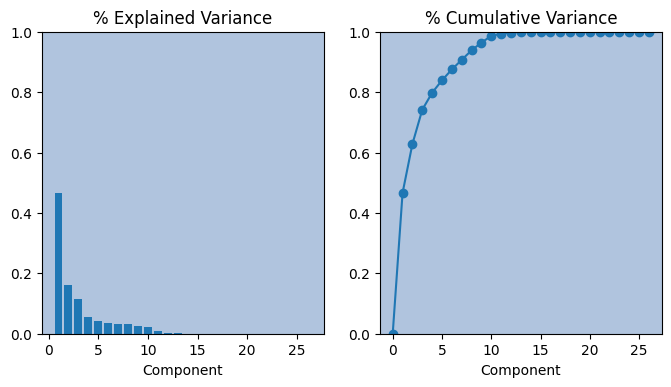

In [73]:
# Look at explained variance
plot_variance(pca);

In [79]:
X_pca.shape, Y.shape

((24645, 26), (24645,))

In [101]:
cols_relevant

['BBH_indicator',
 'BBL_indicator',
 'MACD_line',
 'MACD_diff',
 'RSI',
 'Close_dir_1_lag_1',
 'Close_dir_1_lag_2']

In [135]:
mi_scores = make_mi_scores(X_pca, Y, discrete_features="auto")
cols_relevant1 = mi_scores[mi_scores>0].index.values
print(mi_scores)
cols_relevant1

BBA                  0.005424
Quote_asset_vol      0.005247
OBV                  0.004930
Open                 0.004179
BBL_indicator        0.003862
RSI                  0.003406
Taker_buy_quote      0.002683
BBL                  0.002616
BBH                  0.002502
EMA8                 0.002372
BBH_indicator        0.001463
Close_dir_1_lag_2    0.001455
MACD_diff            0.001146
EMA144               0.000799
Outliyers_STD        0.000616
MACD_line            0.000179
EMA55                0.000000
High                 0.000000
EMA13                0.000000
Taker_buy_base       0.000000
Number_trades        0.000000
Volumne              0.000000
MACD_signal          0.000000
Close                0.000000
Low                  0.000000
Close_dir_1_lag_1    0.000000
Name: MI Scores, dtype: float64


array(['BBA', 'Quote_asset_vol', 'OBV', 'Open', 'BBL_indicator', 'RSI',
       'Taker_buy_quote', 'BBL', 'BBH', 'EMA8', 'BBH_indicator',
       'Close_dir_1_lag_2', 'MACD_diff', 'EMA144', 'Outliyers_STD',
       'MACD_line'], dtype=object)

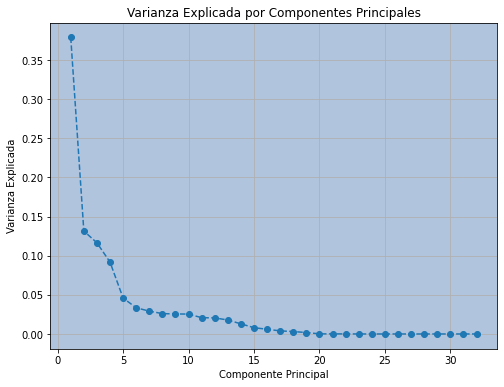

In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Paso 1: Carga de datos
# Supongamos que tienes un DataFrame llamado df con tus datos.

# Paso 2: Preprocesamiento de datos
# Normaliza los datos si es necesario
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns="Open_Time"))  # Estandariza los datos

# Paso 3: Análisis PCA
# Crea un objeto PCA
pca = PCA()

# Ajusta el modelo PCA a los datos
pca.fit(df_scaled)

# Paso 4: Varianza explicada
# Calcula la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Gráfico de la varianza explicada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada por Componentes Principales')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.grid()
plt.show()

# Paso 5: Selección de componentes principales
# Decide cuántos componentes principales deseas retener
n_components = 2  # Cambia este valor según tus necesidades

# Paso 6: Transformación de datos
# Proyecta los datos en el espacio de los componentes principales seleccionados
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)
#df_pca = (df - df.mean(axis=0)) / df.std(axis=0)

# Paso 7: Análisis de resultados
# Ahora df_pca contiene las proyecciones en el espacio de componentes principales.
# Puedes utilizar df_pca en análisis posteriores o visualizaciones.

# Si deseas, puedes obtener los componentes principales y sus pesos
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Puedes explorar los componentes y sus pesos para comprender la estructura de los datos.

# Si deseas, puedes realizar análisis y visualizaciones adicionales con los componentes principales obtenidos.

# Ten en cuenta que el PCA es una técnica poderosa pero interpretar sus resultados puede ser complejo. 


Text(0, 0.5, 'PCA 2')

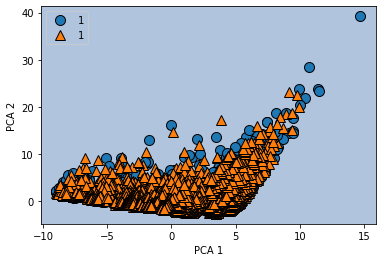

In [95]:
# Analisis de dos dimensiones para grafica
import mglearn 
mglearn.discrete_scatter(df_pca[:,0],df_pca[:,1], df[col_y])
plt.legend(df[col_y],loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escala=MinMaxScaler()
escala.fit(df)
escalada=escala.transform(df)
pca.fit(escalada)
transformada=pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Split for Train and Test

In [108]:
n = X.shape[0]
train_size = .8

x_train, x_test = X.iloc[:int(n*train_size)].copy(), X.iloc[int(n*train_size):].copy()
y_train, y_test = Y.iloc[:int(n*train_size)].copy(), Y.iloc[int(n*train_size):].copy()
print(x_train.shape[0]+ x_test.shape[0]==df.shape[0])
x_train.shape, x_test.shape

True


((19716, 26), (4929, 26))

## otro

In [25]:
table_name

'BTCUSDT_1h'

In [26]:
df.to_csv(f"./Data/Train_{table_name}.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24785 entries, 2021-01-07 01:59:59.999000 to 2023-11-06 07:59:59.999000
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Open_Time          24785 non-null  datetime64[ns]
 1   Open               24785 non-null  float64       
 2   High               24785 non-null  float64       
 3   Low                24785 non-null  float64       
 4   Close              24785 non-null  float64       
 5   Volumne            24785 non-null  float64       
 6   Quote_asset_vol    24785 non-null  float64       
 7   Number_trades      24785 non-null  int64         
 8   Taker_buy_base     24785 non-null  float64       
 9   Taker_buy_quote    24785 non-null  float64       
 10  Close_pc_1         24785 non-null  float64       
 11  Close_pc_2         24785 non-null  float64       
 12  Close_pc_3         24785 non-null  float64       
 13  Close_dir_1 

# Modelos


## Sklearn

In [109]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from Traine.train_models import *
from sklearn.model_selection import TimeSeriesSplit


ts = TimeSeriesSplit(test_size=200)

### Funciones de score: 


| Scoring | Function | Comment|
| --- | ---: | :---: |
|Classification |  |  |
| ‘accuracy’ | metrics.accuracy_score| |
| ‘balanced_accuracy’| metrics.balanced_accuracy_score | |
| ‘top_k_accuracy’ | metrics.top_k_accuracy_score | |
| ‘average_precision’ | metrics.average_precision_score | |
| ‘neg_brier_score’ | metrics.brier_score_loss | |
| ‘f1’ | metrics.f1_score | for binary targets |
| ‘f1_micro’ | metrics.f1_score | micro-averaged |
| ‘f1_macro’ | metrics.f1_score | macro-averaged |
| ‘f1_weighted’ | metrics.f1_score |weighted average |
| ‘f1_samples’ | metrics.f1_score | by multilabel sample|
| ‘neg_log_loss’ | metrics.log_loss | requires predict_proba support |
| ‘precision’ etc. | metrics.precision_score |suffixes apply as with ‘f1’ |
| ‘recall’ etc. | metrics.recall_score | suffixes apply as with ‘f1’ |
| ‘jaccard’ etc. | metrics.jaccard_score | suffixes apply as with ‘f1’ |
| ‘roc_auc’ | metrics.roc_auc_score | |
| ‘roc_auc_ovr’ | metrics.roc_auc_score | |
| ‘roc_auc_ovo’ | metrics.roc_auc_score | |
| ‘roc_auc_ovr_weighted’ | metrics.roc_auc_score | |
| ‘roc_auc_ovo_weighted’ | metrics.roc_auc_score | |

### 1. sklearn.linear_model.RidgeClassifier



Es un modelo de regresión logística regularizado. Utiliza una versión regularizada de la regresión logística, lo que significa que se basa en una función logística para realizar predicciones y agrega una penalización de regularización L2 (norma L2) en los coeficientes del modelo para evitar el sobreajuste.

Proporciona coeficientes para cada característica, lo que facilita la interpretación del impacto de cada característica en las predicciones. También puede utilizarse para problemas de regresión logística multiclase.

incluye regularización L2, lo que lo hace útil cuando se desean evitar problemas de sobreajuste. La regularización L2 penaliza los coeficientes que son demasiado grandes.

está diseñado para trabajar con características numéricas y es más adecuado para datos continuos. Para características categóricas, a menudo se requiere una codificación especial (como codificación one-hot).


***Si deseas un modelo lineal regularizado y fácilmente interpretable, RidgeClassifier puede ser una buena elección.***

In [140]:
# Usando optimizador GridSearchCV

# Definir el rango de valores para cada parámetro
param_grid = {
   #Fuerza de regularización; debe ser un flotador positivo.
   # Regularización mejora el acondicionamiento del problema y reduce la varianza de las estimaciones. 
   # Valores más grandes especifican una regularización más fuerte.
   # Alfa corresponde a en otros modelos lineales como o .1 / (2C)LogisticRegressionLinearSVC
   "alpha" : [0.0001, 0.001, 0.005,0.01,0.1 ],
   "solver" : ["auto", ], # no converge: "lbfgs", "svd", "cholesky", "sag", "saga"
}
scoring = 'accuracy'
             
cols_train = cols_relevant1.copy()

model = RidgeClassifier(random_state=42)

gs = grid_search(x_train[cols_train],y_train,model,param_grid,cv=ts,verbose=2,
                 scoring=scoring,return_train_score=False,show_params=True)


# Evaluar el modelo final en los datos de prueba
model_chido = gs.best_estimator_
accuracy = model_chido.score(x_test[cols_train], y_test)
print("Accuracy en los datos de test  :",model_chido.score(x_train[cols_train], y_train) )
print("Accuracy en los datos de prueba:", accuracy)
y_pred = model_chido.predict(x_test[cols_train])
get_scores_clasification(y_test, y_pred,table_name)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................alpha=0.0001, solver=auto; total time=   0.0s
[CV] END ..........................alpha=0.0001, solver=auto; total time=   0.0s[CV] END ..........................alpha=0.0001, solver=auto; total time=   0.0s
[CV] END ..........................alpha=0.0001, solver=auto; total time=   0.1s

[CV] END ..........................alpha=0.0001, solver=auto; total time=   0.0s
[CV] END ...........................alpha=0.001, solver=auto; total time=   0.0s
[CV] END ...........................alpha=0.001, solver=auto; total time=   0.0s
[CV] END ...........................alpha=0.001, solver=auto; total time=   0.0s
[CV] END ...........................alpha=0.001, solver=auto; total time=   0.0s
[CV] END ...........................alpha=0.005, solver=auto; total time=   0.0s
[CV] END ...........................alpha=0.001, solver=auto; total time=   0.0s
[CV] END ...........................alpha=0.005, 

/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.14549e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.72377e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.34626e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.01127e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/he

[CV] END ...........................alpha=0.005, solver=auto; total time=   0.0s
[CV] END ............................alpha=0.01, solver=auto; total time=   0.0s
[CV] END ............................alpha=0.01, solver=auto; total time=   0.0s
[CV] END ............................alpha=0.01, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END ............................alpha=0.01, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s


/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.65119e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.87651e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.04678e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.45702e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Mejores parámetros: {'alpha': 0.0001, 'solver': 'auto'}
Mejor puntaje: 0.534
Accuracy en los datos de test  : 0.5388009738283628
Accuracy en los datos de prueba: 0.5374315276932441
************************ BTCUSDT_1h ************************
+-------------------+----------+---------+
| Score Fn          |    Value | Ideal   |
+===================+==========+=========+
| Accuracy          | 0.537432 | -> 1    |
+-------------------+----------+---------+
| Average precision | 0.528032 | -> 1    |
+-------------------+----------+---------+
| Roc Auc           | 0.53706  | -> 1    |
+-------------------+----------+---------+
| F1                | 0.551534 | -> 1    |
+-------------------+----------+---------+


### 2. DecisionTreeClassifier

Es un modelo de árbol de decisión. Utiliza un árbol de decisión para tomar decisiones clasificatorias. El árbol se construye dividiendo repetidamente los datos en función de las características, de manera que se maximice la pureza de las hojas.

es un modelo no lineal que crea divisiones en función de las características. Puede ser más difícil de interpretar en términos de la importancia de las características.

no tiene regularización incorporada. Tiende a ajustarse completamente a los datos de entrenamiento y puede ser propenso al sobreajuste, especialmente en conjuntos de datos pequeños.

puede manejar tanto características numéricas como categóricas sin requerir una codificación especial. Puede trabajar directamente con datos mixtos.

***Si estás tratando con datos no lineales o deseas un modelo basado en árboles, entonces DecisionTreeClassifier podría ser más apropiado.***

In [142]:
# Usando optimizador GridSearchCV

# Definir el rango de valores para cada parámetro
param_grid = {
   # 'n_estimators': [50,100, 200, 300], # Cantidad de arboles
    'max_depth': [ 10, 20,80],
    'min_samples_split': [2, 5, 10], # Cantidad de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4,10],   # Cantidad de muestras para dividir una hoja
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}
scoring = 'accuracy'

cols_train = cols_relevant1.copy()

model = DecisionTreeClassifier(random_state=42)

gs = grid_search(x_train[cols_train],y_train,model,param_grid,cv=ts,verbose=1,
                 scoring=scoring,return_train_score=False, show_params=True)



# Evaluar el modelo final en los datos de prueba
model_chido = gs.best_estimator_
accuracy = model_chido.score(x_test[cols_train], y_test)
print("Accuracy en los datos de test  :",model_chido.score(x_train[cols_train], y_train) )
print("Accuracy en los datos de prueba:", accuracy)
y_pred = model_chido.predict(x_test[cols_train])
get_scores_clasification(y_test, y_pred,table_name)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mejores parámetros: {'criterion': 'gini', 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor puntaje: 0.554
Accuracy en los datos de test  : 0.8292757151552039
Accuracy en los datos de prueba: 0.4962467031852303
************************ BTCUSDT_1h ************************
+-------------------+----------+---------+
| Score Fn          |    Value | Ideal   |
+===================+==========+=========+
| Accuracy          | 0.496247 | -> 1    |
+-------------------+----------+---------+
| Average precision | 0.506068 | -> 1    |
+-------------------+----------+---------+
| Roc Auc           | 0.495667 | -> 1    |
+-------------------+----------+---------+
| F1                | 0.517208 | -> 1    |
+-------------------+----------+---------+


### SGDClassifier
[documentacion here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

In [145]:
from sklearn.linear_model import SGDClassifier

In [147]:
# Usando optimizador GridSearchCV

# Definir el rango de valores para cada parámetro
param_grid = {
    # default=’hinge’
    "loss":["hinge", "log_loss", "squared_hinge", "perceptron",
            "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"], #"modified_huber",
    # default=’l2’
    "penalty": ["l2", "l1", "elasticnet", None], 
    # default=0.0001
    "alpha" : [0.0001, 0.00001, 0.00005 ],
    # default = True
    "shuffle":[False],
    # default = "optimal"
    "learning_rate": ["constant", "optimal","invscaling","adaptive"]
}
scoring = 'accuracy'

cols_train = cols_relevant1.copy()

model = SGDClassifier(random_state=42)

gs = grid_search(x_train[cols_train],y_train,model,param_grid,cv=ts,verbose=1,
                 scoring=scoring,return_train_score=False, show_params=True)



# Evaluar el modelo final en los datos de prueba
model_chido = gs.best_estimator_
accuracy = model_chido.score(x_test[cols_train], y_test)
print("Accuracy en los datos de test  :",model_chido.score(x_train[cols_train], y_train) )
print("Accuracy en los datos de prueba:", accuracy)
y_pred = model_chido.predict(x_test[cols_train])
get_scores_clasification(y_test, y_pred,table_name)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/hector/anaconda3/envs/hlp/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warning

Mejores parámetros: {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'elasticnet', 'shuffle': False}
Mejor puntaje: 0.527
Accuracy en los datos de test  : 0.4970075065936295
Accuracy en los datos de prueba: 0.4919862040981944
************************ BTCUSDT_1h ************************
+-------------------+-------------+---------+
| Score Fn          |       Value | Ideal   |
+===================+=============+=========+
| Accuracy          | 0.491986    | -> 1    |
+-------------------+-------------+---------+
| Average precision | 0.508413    | -> 1    |
+-------------------+-------------+---------+
| Roc Auc           | 0.5002      | -> 1    |
+-------------------+-------------+---------+
| F1                | 0.000798085 | -> 1    |
+-------------------+-------------+---------+


In [156]:
print("Number of weight updates performed during training: ",model_chido.t_)
model_chido.n_iter_


Number of weight updates performed during training:  19716001.0


1000

### SVM
[documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
# Usando optimizador GridSearchCV

# Definir el rango de valores para cada parámetro
param_grid = {
    #default = 1
    "C":[0.5,1,10,30],
    # default=rbf
    "kernel":["‘linear", "poly", "rbf", "sigmoid", "precomputed"]
    # default=3
    "degree": [1,,2,3,5,8], 
    # default=0.0001
    "gamma" : [0.0001, 0.00001, 0.00005 ],
    # default = True
    "shuffle":[False],
    # default = "optimal"
    "learning_rate": ["constant", "optimal","invscaling","adaptive"]
}
scoring = 'accuracy'

cols_train = cols_relevant1.copy()

model = SGDClassifier(random_state=42)

gs = grid_search(x_train[cols_train],y_train,model,param_grid,cv=ts,verbose=1,
                 scoring=scoring,return_train_score=False, show_params=True)



# Evaluar el modelo final en los datos de prueba
model_chido = gs.best_estimator_
accuracy = model_chido.score(x_test[cols_train], y_test)
print("Accuracy en los datos de test  :",model_chido.score(x_train[cols_train], y_train) )
print("Accuracy en los datos de prueba:", accuracy)
y_pred = model_chido.predict(x_test[cols_train])
get_scores_clasification(y_test, y_pred,table_name)

## Tensorflow

## Pytorch